In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

# Question 1
## Does the cost category (cost) influence the average rating (rate) of a restaurant?

In [ ]:
# Quering the cost_category and rate coumns from the bucket
query = """ SELECT cost_category, rate FROM  `suggester-423307.cleaned_file.table1` """

#Reading the query as Pandas DataFrame
df = pd.read_gbq(query)

# Fitting the ANOVA model
model = ols('rate ~ cost_category', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Post-hoc test (Tukey's HSD)
tukey_results = pairwise_tukeyhsd(endog=df['rate'], groups=df['cost_category'], alpha=0.05)
print(tukey_results)

                      sum_sq       df            F  PR(>F)
cost_category   20156.148196      2.0  3729.577876     0.0
Residual       167566.269883  62011.0          NaN     NaN
               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
        group1                group2        meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------------------
cheap-eats restaurant fine-dining restaurnt   2.0413   0.0  1.9859  2.0967   True
cheap-eats restaurant  med-range-restaurant   0.8328   0.0   0.793  0.8725   True
fine-dining restaurnt  med-range-restaurant  -1.2086   0.0 -1.2554 -1.1617   True
---------------------------------------------------------------------------------


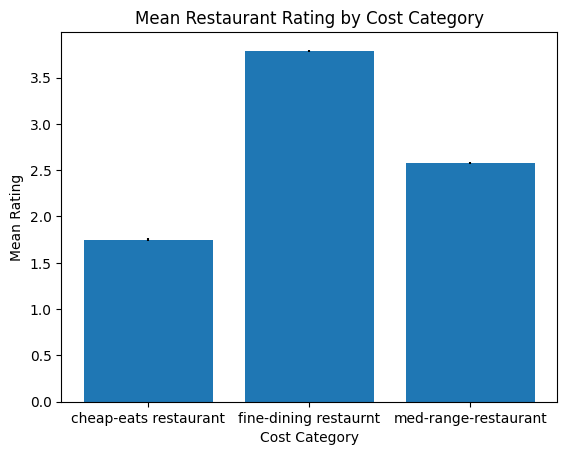

In [ ]:
# Calculate mean and standard error for each cost category
means = df.groupby('cost_category')['rate'].mean()
stds = df.groupby('cost_category')['rate'].std()
n = df.groupby('cost_category')['rate'].count()
standard_error = stds / np.sqrt(n)

# Create the bar plot
plt.bar(means.index, means, yerr=standard_error)
plt.title('Mean Restaurant Rating by Cost Category')
plt.xlabel('Cost Category')
plt.ylabel('Mean Rating')
plt.show()

# Interpretation of the Results

- The p-value (PR(>F)) is essentially 0, which is much smaller than the typical significance level of 0.05. This indicates a strong evidence to reject the null hypothesis.
- There is a statistically significant difference in average ratings across different cost categories.

Interpretation of Tukey HSD Table:

- All pairwise comparisons between the cost categories are statistically significant (p-adj < 0.05).
- Customers rate fine-dining restaurants significantly higher than both cheap-eats and mid-range restaurants.
- Mid-range restaurants have significantly higher ratings than cheap-eats restaurants.

#### Overall Conclusion
The analysis indicates a strong relationship between the cost category of a restaurant and its average rating. Customers are willing to pay more for higher-rated restaurants.




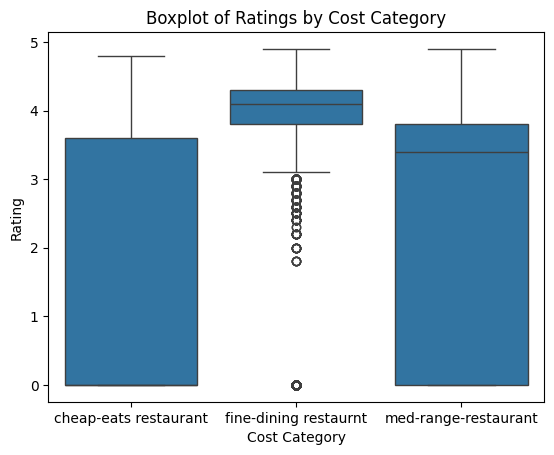

In [ ]:
sns.boxplot(x='cost_category', y='rate', data=df)
plt.title('Boxplot of Ratings by Cost Category')
plt.xlabel('Cost Category')
plt.ylabel('Rating')
plt.show()


# Question 2


In [ ]:
query = """ SELECT online_order, rate FROM  `suggester-423307.cleaned_file.table1` """
df= pd.read_gbq(query)
data_with_online_order = df[df['online_order'] == True]['rate']
data_without_online_order = df[df['online_order'] == False]['rate']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(data_with_online_order, data_without_online_order)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in average ratings between restaurants with and without online ordering.")
else:
    print("There is no significant difference in average ratings between restaurants with and without online ordering.")


T-statistic: 116.66138185466845
P-value: 0.0
There is a significant difference in average ratings between restaurants with and without online ordering.


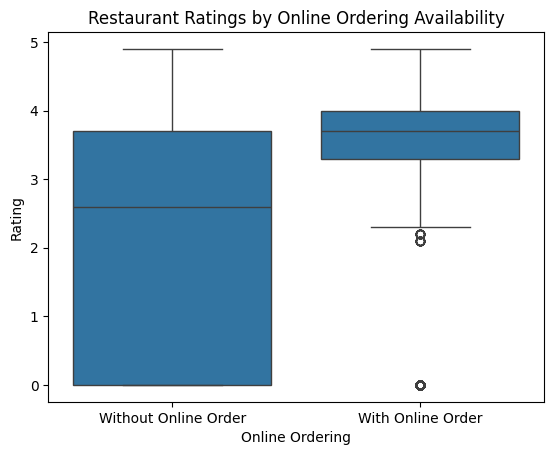

In [ ]:
# Create a new DataFrame with a column indicating whether online ordering is available
df['online_order_group'] = df['online_order'].map({True: 'With Online Order', False: 'Without Online Order'})

# Create the box plot
sns.boxplot(x='online_order_group', y='rate', data=df)
plt.title('Restaurant Ratings by Online Ordering Availability')
plt.xlabel('Online Ordering')
plt.ylabel('Rating')
plt.show()

## My Observations:
- Median Rating: Restaurants with online ordering tend to have a slightly higher median rating compared to those without. This suggests a general trend of better ratings for restaurants offering online ordering.
- Distribution: The box for restaurants with online ordering is slightly wider, indicating a larger spread in ratings. This could imply more variability in customer experiences for these restaurants.
- Outliers: There's a single outlier for restaurants without online ordering, suggesting an unusually low rating for one or a few establishments.
- Overall Trend: The visual suggests a potential positive correlation between offering online ordering and achieving higher restaurant ratings.

# Question 3

In [ ]:
query = """ SELECT votes, rest_type FROM  `suggester-423307.cleaned_file.table1` """
df=pd.read_gbq(query)
# Fitting the ANOVA model
model = ols('votes ~ rest_type', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Post-hoc test (Tukey's HSD)


tukey_results = pairwise_tukeyhsd(endog=df['votes'], groups=df['rest_type'], alpha=0.05)
print(tukey_results)


                 sum_sq       df         F  PR(>F)
rest_type  1.070168e+10   3501.0  7.641451     0.0
Residual   2.340611e+10  58512.0       NaN     NaN


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [ ]:
sns.boxplot(x='rest_type', y='rate', data=df)
plt.title('Restaurant Ratings by Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Rating')
plt.show()